In [32]:
# Import libraries
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loading import ScaniaDataLoader
from src.visualization import DataVisualizer

# Settings
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [36]:
# Force reload of modules to pick up changes
import importlib
import src.visualization
importlib.reload(src.visualization)
from src.visualization import DataVisualizer
print("✅ Modules reloaded!")

✅ Modules reloaded!


## 1. Load Data

In [17]:
# Initialize data loader
loader = ScaniaDataLoader(data_dir='../data/raw')

# Get dataset information
info = loader.get_dataset_info()
print("Dataset Information:")
print(f"Training samples: {info['train']['n_samples']:,}")
print(f"Validation samples: {info['validation']['n_samples']:,}")
print(f"Test samples: {info['test']['n_samples']:,}")
print(f"Total samples: {info['total']['n_samples']:,}")

Dataset Information:
Training samples: 23,550
Validation samples: 5,046
Test samples: 5,045
Total samples: 33,641


In [18]:
# Load training data
train_ops, train_specs, train_tte = loader.load_train_data()

print(f"\nTraining Data Shapes:")
print(f"Operational readouts: {train_ops.shape}")
print(f"Specifications: {train_specs.shape}")
print(f"TTE labels: {train_tte.shape}")

INFO:src.data_loading:Loading training data...
INFO:src.data_loading:Operational readouts: (1122452, 107)
INFO:src.data_loading:Specifications: (23550, 9)
INFO:src.data_loading:TTE labels: (23550, 3)
INFO:src.data_loading:Operational readouts: (1122452, 107)
INFO:src.data_loading:Specifications: (23550, 9)
INFO:src.data_loading:TTE labels: (23550, 3)



Training Data Shapes:
Operational readouts: (1122452, 107)
Specifications: (23550, 9)
TTE labels: (23550, 3)


In [21]:
# Check unique vehicle IDs
unique_vehicles = train_ops['vehicle_id'].unique()
print(f"Number of unique vehicles: {len(unique_vehicles)}")
print(f"First 10 vehicle IDs: {sorted(unique_vehicles)[:10]}")
print(f"Min vehicle ID: {train_ops['vehicle_id'].min()}")
print(f"Max vehicle ID: {train_ops['vehicle_id'].max()}")

Number of unique vehicles: 23550
First 10 vehicle IDs: [np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8), np.int64(13), np.int64(14), np.int64(15), np.int64(17)]
Min vehicle ID: 0
Max vehicle ID: 33643


## 2. Dataset Overview

In [20]:
# Operational readouts overview
print("Operational Readouts - First 5 rows:")
display(train_ops.head())

print("\nColumn types:")
print(train_ops.dtypes.value_counts())

Operational Readouts - First 5 rows:


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,167_4,167_5,167_6,167_7,167_8,167_9,309_0,272_0,272_1,272_2,272_3,272_4,272_5,272_6,272_7,...,397_11,397_12,397_13,397_14,397_15,397_16,397_17,397_18,397_19,397_20,397_21,397_22,397_23,397_24,397_25,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,1269525.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1435083.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,...,224.0,53161.0,178881.0,138250.0,13328.0,3581.0,88.0,16361.0,131601.0,116541.0,13506.0,2856.0,48.0,6337.0,105412.0,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,1269526.0,4772940.0,2706706.0,222225.0,6240.0,0.0,70.0,1440661.0,857662.0,384579.0,668642.0,7239843.0,398490.0,3887.0,0.0,...,224.0,53210.0,178883.0,138252.0,13328.0,3582.0,88.0,16368.0,131601.0,116542.0,13507.0,2856.0,48.0,6339.0,105413.0,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1787736.0,1133132.0,598351.0,1167062.0,12314224.0,460240.0,3887.0,0.0,...,232.0,75038.0,352791.0,327992.0,17325.0,4451.0,92.0,24028.0,234737.0,216619.0,17000.0,3476.0,48.0,12055.0,167693.0,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1824409.0,1166074.0,634595.0,1233908.0,13275730.0,466753.0,3887.0,0.0,...,232.0,77118.0,394083.0,359060.0,17941.0,4573.0,92.0,25164.0,253706.0,232912.0,17583.0,3573.0,48.0,13199.0,176596.0,150565.0,19832.0,2522.0,12.0,1444.0,211688.0,318901.0,107745.0,19406.0,453.0
4,0,21.0,365550.0,15295.0,14966985.0,2720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1873614.0,1176071.0,639587.0,1266369.0,13758524.0,474047.0,3887.0,0.0,...,232.0,79222.0,411299.0,371612.0,18614.0,4681.0,92.0,25736.0,268834.0,242477.0,18108.0,3641.0,52.0,13400.0,183724.0,155913.0,20573.0,2562.0,12.0,1445.0,213956.0,323997.0,109514.0,19535.0,454.0



Column types:
float64    106
int64        1
Name: count, dtype: int64


In [13]:
# Specifications overview
print("Vehicle Specifications - First 5 rows:")
display(train_specs.head())

print("\nSpecification columns:")
print(train_specs.columns.tolist())

Vehicle Specifications - First 5 rows:


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1



Specification columns:
['vehicle_id', 'Spec_0', 'Spec_1', 'Spec_2', 'Spec_3', 'Spec_4', 'Spec_5', 'Spec_6', 'Spec_7']


In [22]:
# Labels overview
print("TTE Labels - First 5 rows:")
display(train_tte.head())

print("\nLabel statistics:")
print(train_tte.describe())

TTE Labels - First 5 rows:


,vehicle_id,length_of_study_time_step,in_study_repair
0,0,510.0,0
1,2,281.8,0
2,3,293.4,0
3,4,210.0,0
4,5,360.4,0



Label statistics:
         vehicle_id  length_of_study_time_step  in_study_repair
count  23550.000000               23550.000000     23550.000000
mean   16851.663185                 240.349019         0.096476
std     9714.309420                  88.782437         0.295249
min        0.000000                  73.400000         0.000000
25%     8468.250000                 163.800000         0.000000
50%    16882.500000                 218.200000         0.000000
75%    25247.750000                 312.000000         0.000000
max    33643.000000                 510.000000         1.000000


## 3. Class Distribution Analysis

In [23]:
# Create binary labels (0 = healthy, 1 = failed)
train_labels = train_tte['in_study_repair']

print("Class Distribution:")
print(train_labels.value_counts())
print(f"\nFailure rate: {train_labels.mean() * 100:.2f}%")

Class Distribution:
in_study_repair
0    21278
1     2272
Name: count, dtype: int64

Failure rate: 9.65%


INFO:src.visualization:Saved class distribution to ../results/figures/class_distribution.png


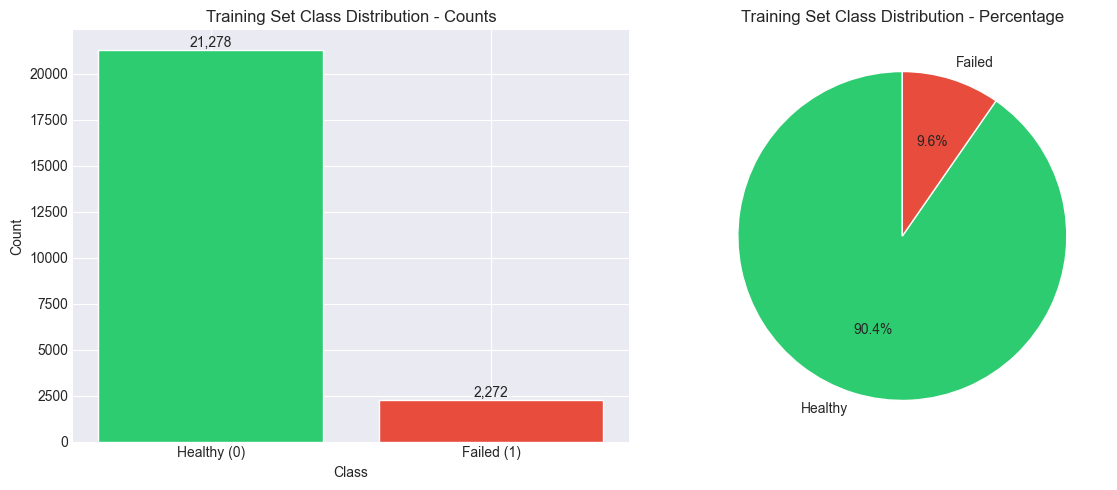

In [37]:
# Visualize class distribution
visualizer = DataVisualizer()
fig = visualizer.plot_class_distribution(
    train_labels, 
    title="Training Set Class Distribution",
    save_path='../results/figures/class_distribution.png'
)
plt.show()

## 4. Missing Data Analysis

In [24]:
# Analyze missing data in operational readouts
missing_ops = train_ops.isnull().sum()
missing_ops_pct = (missing_ops / len(train_ops) * 100).sort_values(ascending=False)

print("Operational Readouts - Missing Data:")
print(f"Total columns: {len(train_ops.columns)}")
print(f"Columns with missing data: {(missing_ops > 0).sum()}")
print(f"\nTop 10 columns with most missing data:")
print(missing_ops_pct.head(10))

Operational Readouts - Missing Data:
Total columns: 107
Columns with missing data: 104

Top 10 columns with most missing data:
291_1     0.857765
291_3     0.857765
291_0     0.857765
291_10    0.857765
291_9     0.857765
291_8     0.857765
291_2     0.857765
291_4     0.857765
291_5     0.857765
291_7     0.857765
dtype: float64


In [27]:
# Visualize missing data
fig = visualizer.plot_missing_data(
    train_ops, 
    threshold=5.0,  # Only show columns with >5% missing
    save_path='../results/figures/missing_data.png'
)
if fig:
    plt.show()

INFO:src.visualization:No missing data found


## 5. Sensor Statistics

In [28]:
# Get sensor columns (exclude id columns)
sensor_cols = [col for col in train_ops.columns if col not in ['vehicle_id', 'time_step']]

print(f"Number of sensor columns: {len(sensor_cols)}")
print(f"\nBasic statistics for first 5 sensors:")
display(train_ops[sensor_cols[:5]].describe())

Number of sensor columns: 105

Basic statistics for first 5 sensors:


,171_0,666_0,427_0,837_0,167_0
count,1.122452e+06,1.122412e+06,1.116047e+06,1.122413e+06,1.119590e+06
mean,3.432285e+06,1.220519e+05,1.297269e+08,4.432735e+04,1.231484e+04
std,2.766660e+06,1.441444e+05,1.005308e+08,7.982317e+04,4.523900e+04
min,1.500000e+01,0.000000e+00,6.050000e+02,0.000000e+00,0.000000e+00
25%,1.288320e+06,2.970375e+04,5.180904e+07,2.848000e+03,4.320000e+02
50%,2.781472e+06,7.645500e+04,1.080906e+08,1.575500e+04,3.570000e+03
75%,4.949614e+06,1.620980e+05,1.853690e+08,5.212300e+04,1.299600e+04
max,3.048960e+07,5.886459e+06,1.046455e+09,6.524252e+06,7.526577e+06


INFO:src.visualization:Saved feature distributions to ../results/figures/sensor_distributions.png


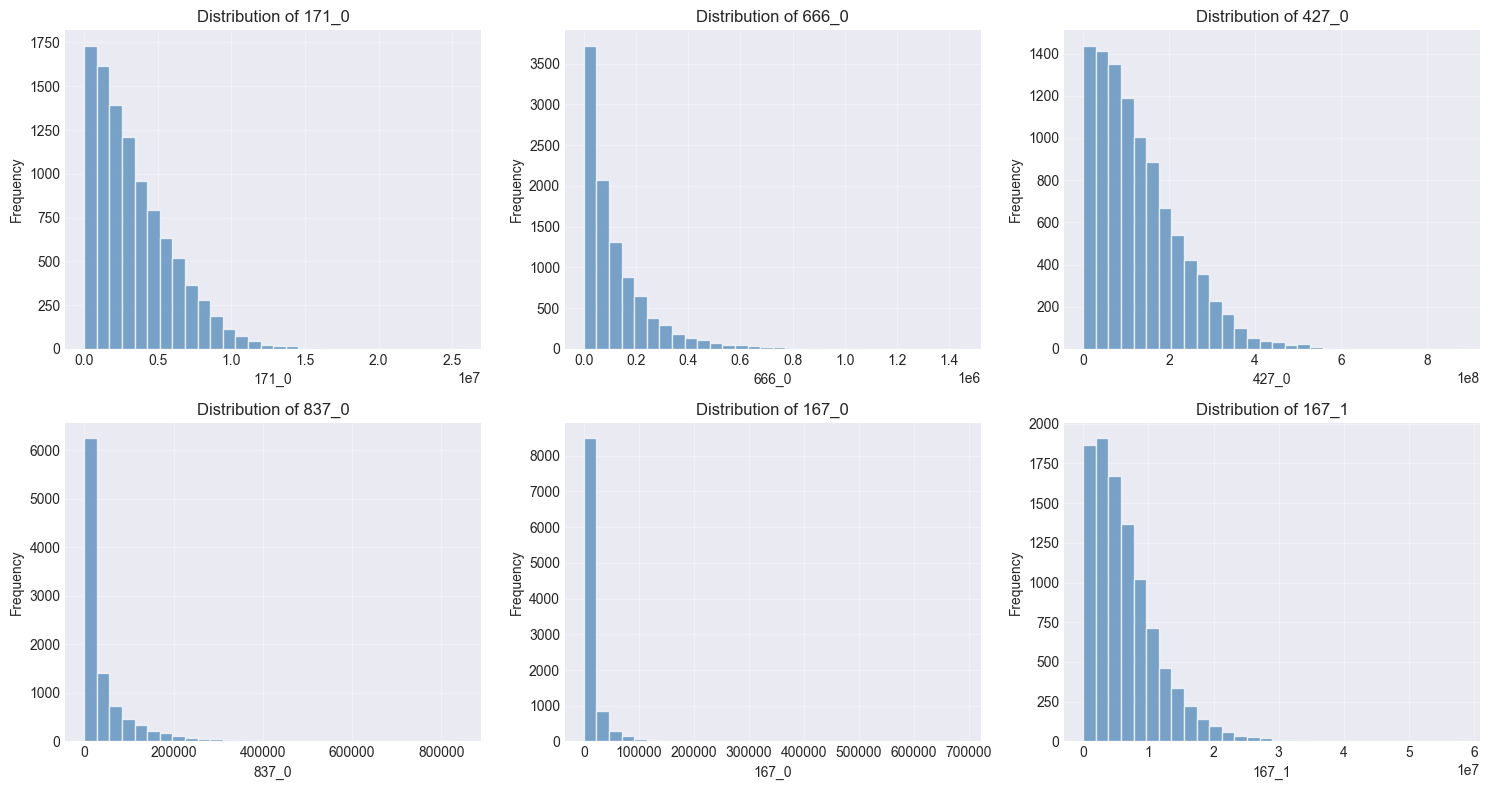

In [29]:
# Distribution of first few sensors
sample_sensors = sensor_cols[:6]
fig = visualizer.plot_feature_distributions(
    train_ops.sample(10000),  # Sample for faster plotting
    sample_sensors,
    save_path='../results/figures/sensor_distributions.png'
)
plt.show()

## 6. Time Series Patterns

Readings per vehicle statistics:
count    23550.000000
mean        47.662505
std         27.406028
min          5.000000
25%         28.000000
50%         43.000000
75%         64.000000
max        303.000000
dtype: float64


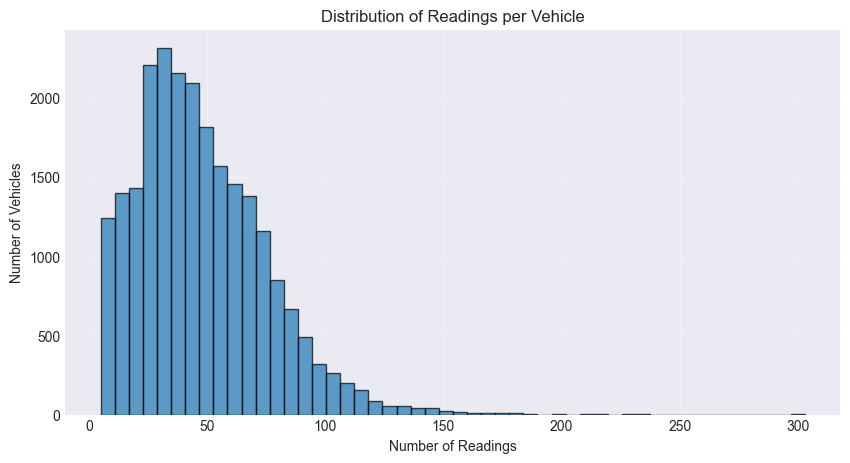

In [30]:
# Analyze readings per vehicle
readings_per_vehicle = train_ops.groupby('vehicle_id').size()

print("Readings per vehicle statistics:")
print(readings_per_vehicle.describe())

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(readings_per_vehicle, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Readings')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Readings per Vehicle')
plt.grid(alpha=0.3)
plt.savefig('../results/figures/readings_per_vehicle.png', dpi=300, bbox_inches='tight')
plt.show()

INFO:src.visualization:Saved time series plot to ../results/figures/sample_time_series.png


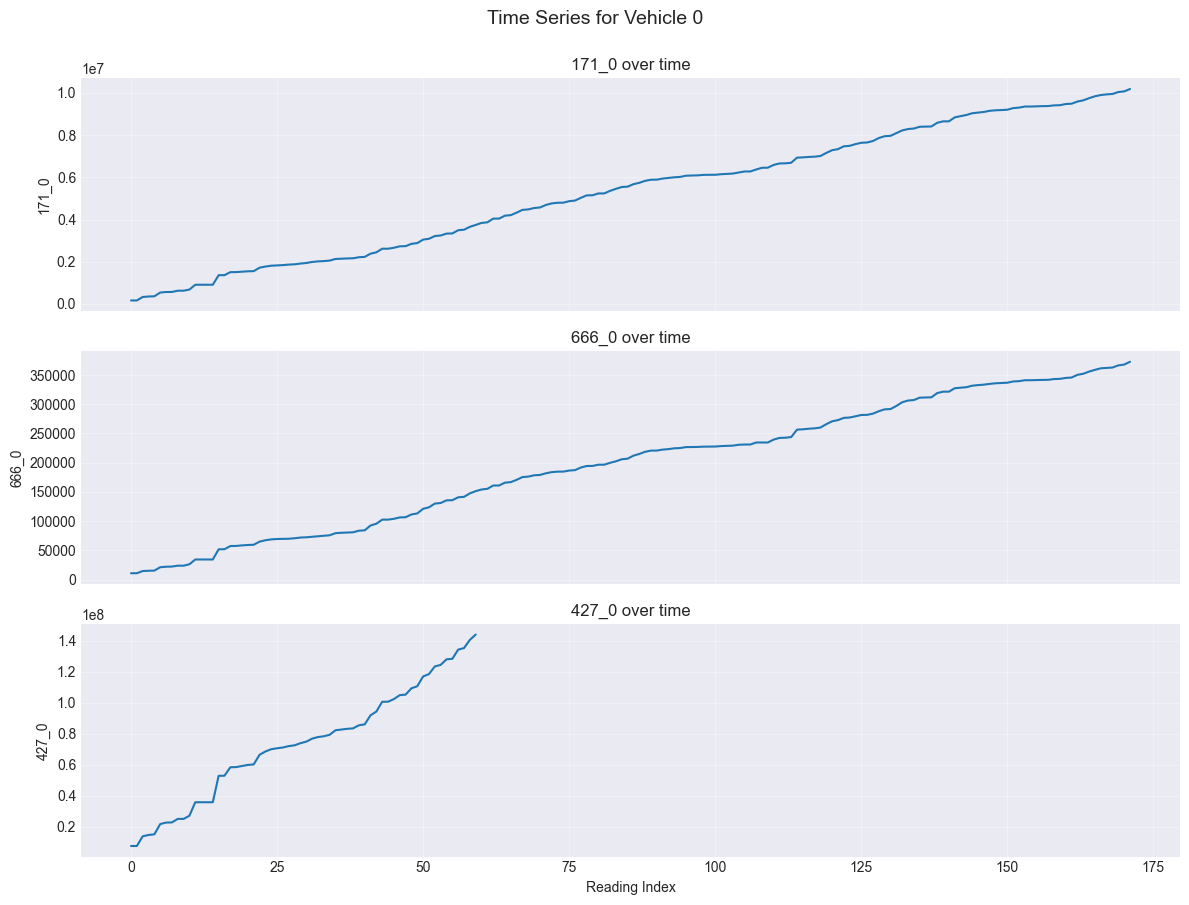

In [38]:
# Visualize time series for a sample vehicle
sample_vehicle = train_ops['vehicle_id'].iloc[0]
sample_sensors = sensor_cols[:3]

fig = visualizer.plot_time_series(
    train_ops,
    vehicle_id=sample_vehicle,
    sensors=sample_sensors,
    save_path='../results/figures/sample_time_series.png'
)
plt.show()

## 7. Key Insights

**Summary of findings**:
- Dataset contains multivariate time series data with variable-length sequences
- Significant class imbalance (~9.6% failure rate)
- Substantial missing data in some sensor readings
- Variable number of readings per vehicle

**Next steps**:
1. Data preprocessing and cleaning
2. Feature engineering from time series
3. Handling class imbalance
4. Model development